<img src="kschool.png" width="120" height="120" align="right"/>

# Content-based RecSys

<div class  = "alert alert-info">

Content-based filtering utiliza las características conocidas de los items para recomendar nuevos items que son similares (en características) a aquellos items que le gustaron al usuario en el pasado.

</div>

<div class  = "alert alert-info">

**Destacamos**:
- Es necesario conocer las características de cada item.
- Es necesario que el usuario haya mostrado o puntuado previamente algunos items.
</div>

### Ejemplo:

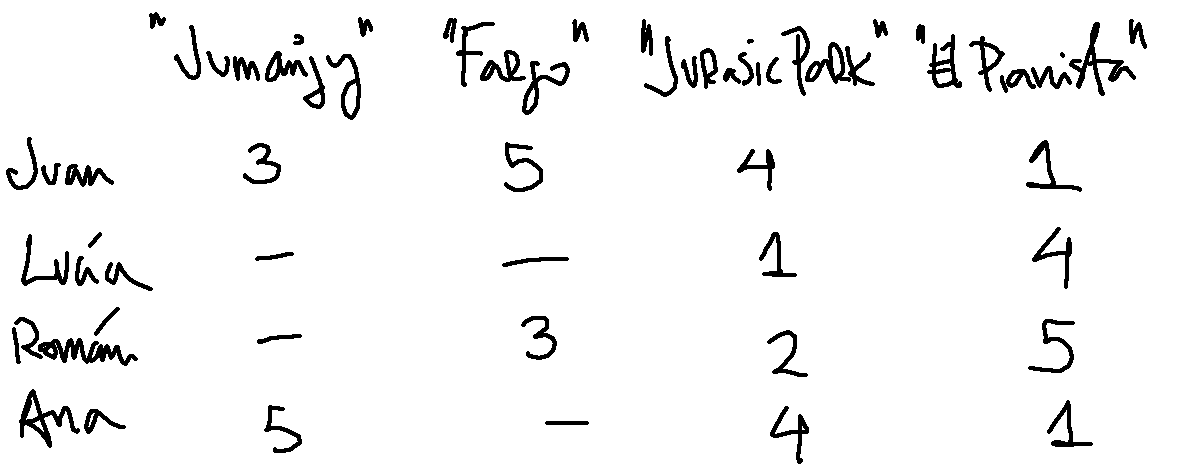

### ----------------------

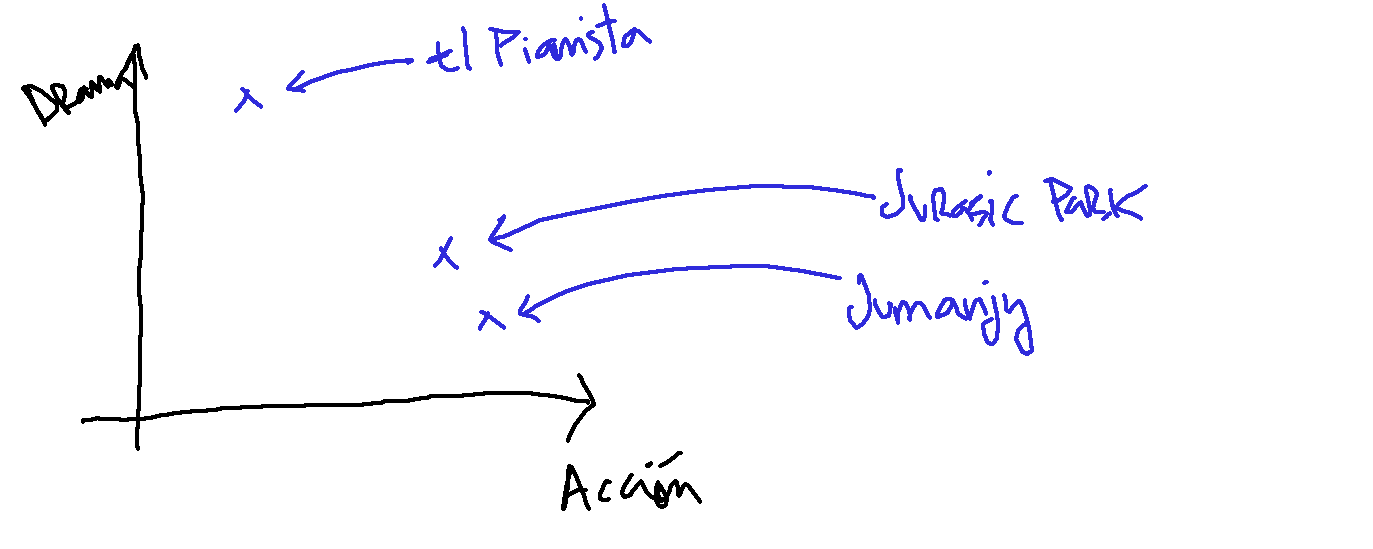

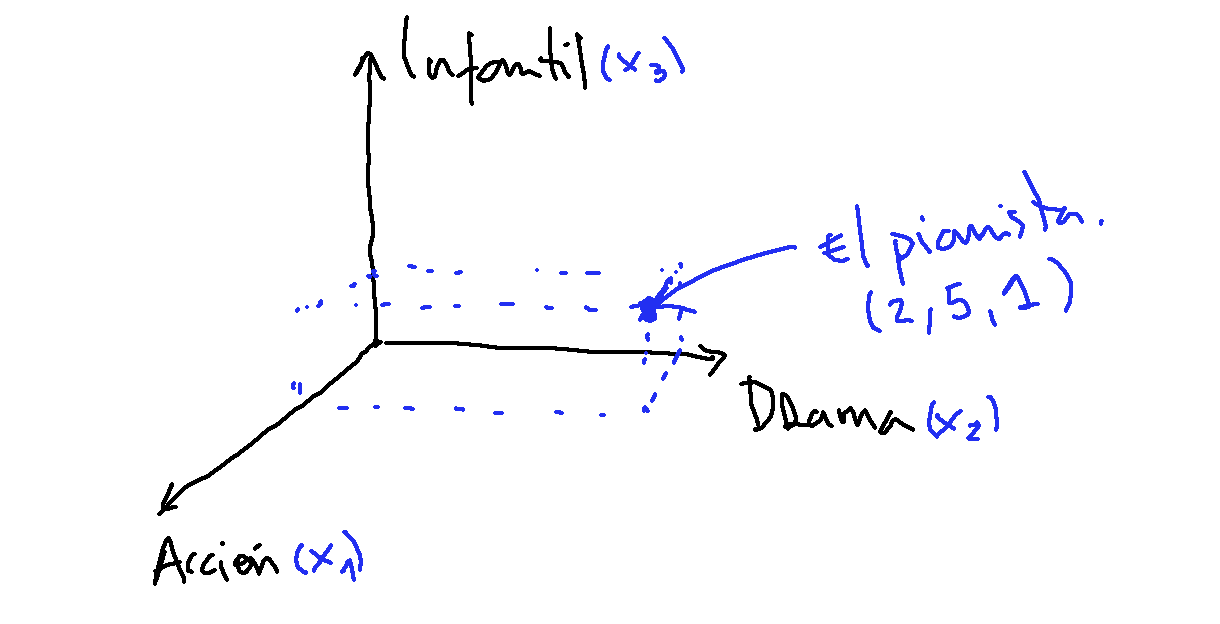

### ----------------------

### Item-feature-matrix

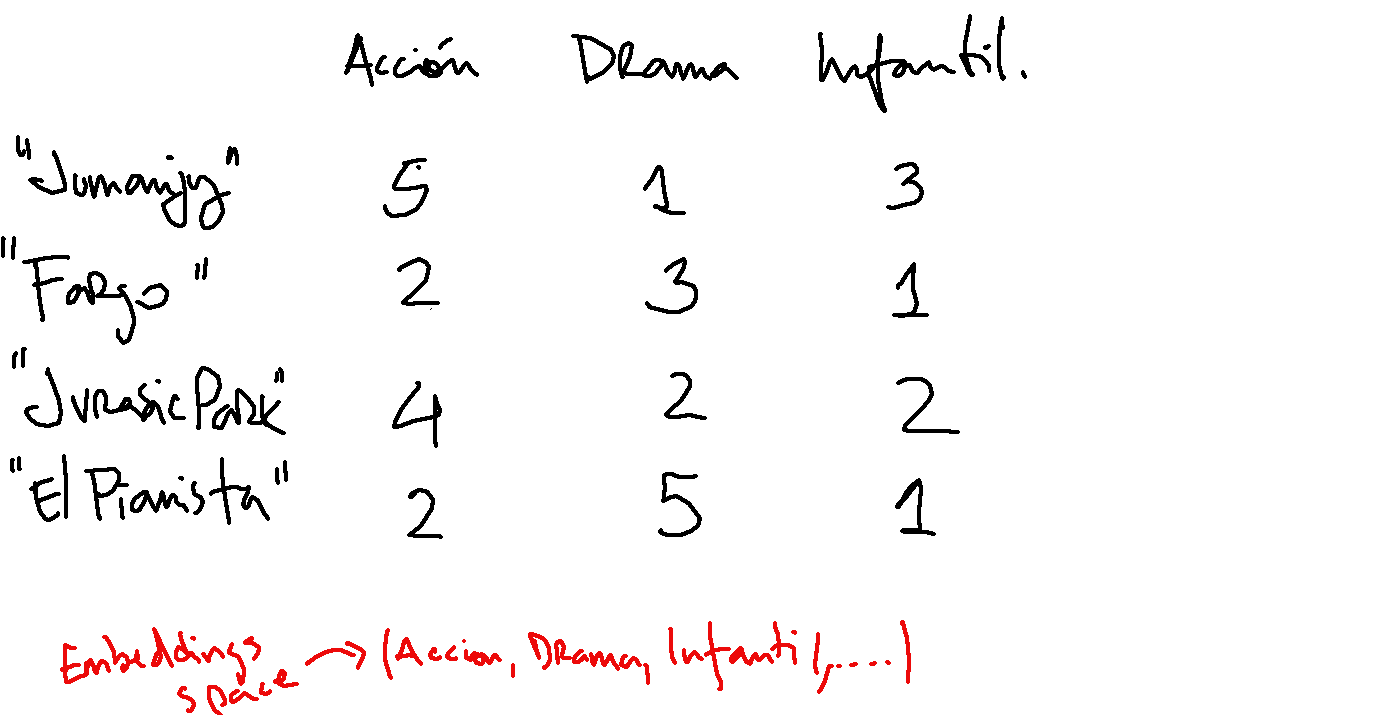

<div class  = "alert alert-warning">
    
**Importante:** 

- Es necesario conocer las características de cada item >>> categorías de las películas
- Es necesario que el usuario haya mostrado o puntuado previamente algunos items >>> likes a películas 

</div>

##### ¿Podemos encontrar películas similares?

La respuesta es sí, gracias a la posición de cada película en el embeddings space y el producto escalar.

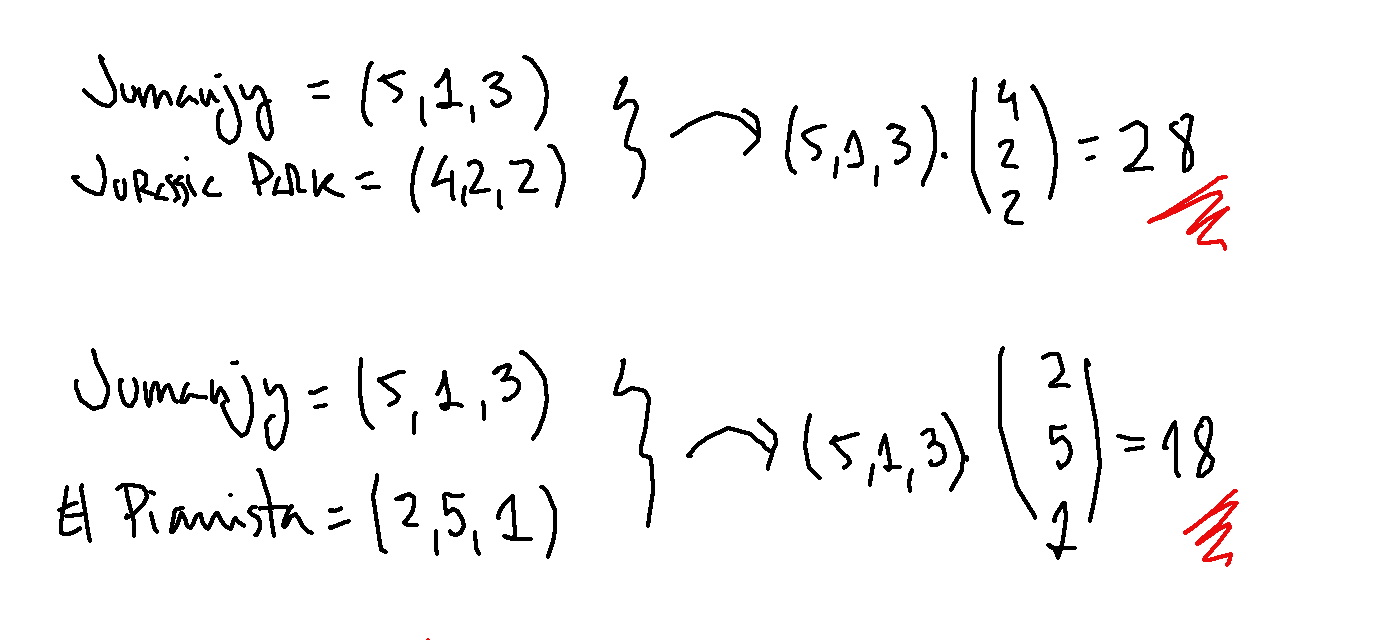

##### Coseno del ángulo entre dos vectores:

$$cos\,(\alpha)= \dfrac{\vec{u} \cdot \vec{v}}{\|\vec{u}\| \cdot \|\vec{v}\|} $$

- Cuanto más grande es el valor del coseno, más parecidas son los items
- Al estar normalizado, su valor máximo será 1. 
- En ocasiones, se habla de la distancia o similaridad del coseno como $1-cos(\alpha)$

##### ¿Podemos conocer los gustos generales de un usuario?

La respuesta es sí, mediante el **user-feature-vector**

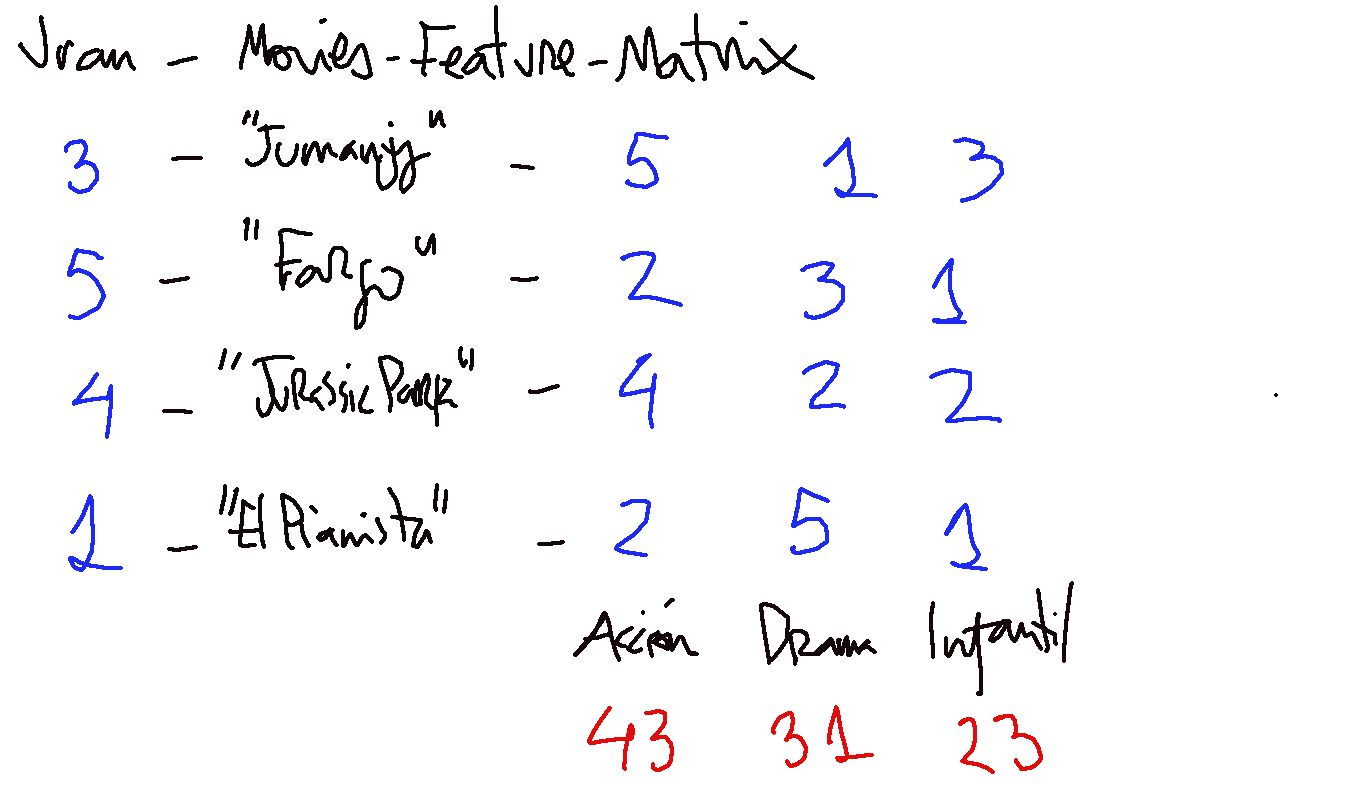

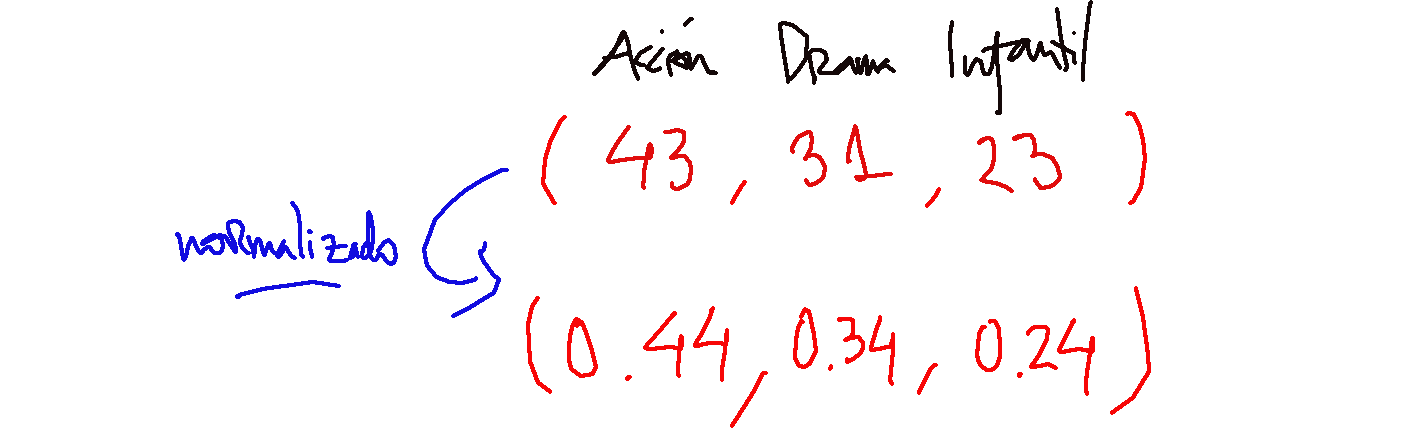

##### ¿Estamos preparados para hacer ahora recomendaciones de nuevas películas?

La respuesta es sí, gracias al **user-feature-vector** y a la **item-feature-matrix**.

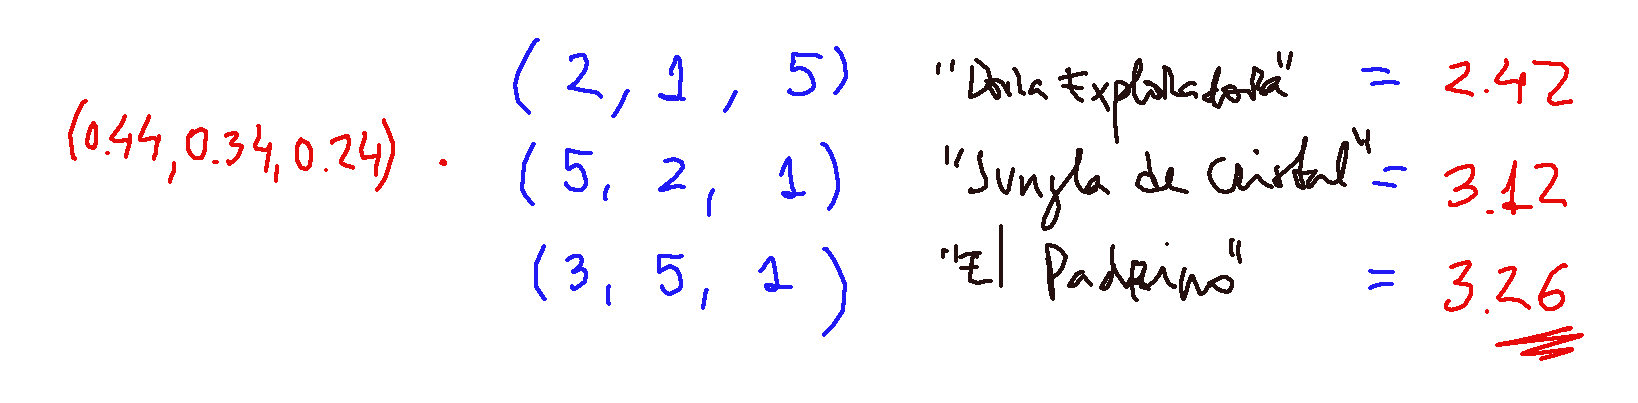

<div class  = "alert alert-warning">
    
**Desventajas**:
    
- Dependes de una buena categorización de los items previo.
- No puedes construir una buena user-feature-vector hasta que no tengas un histórico de puntuaciones (cold-start problem).
   
</div>

# Práctica

### Dataset

In [1]:
import pandas as pd

In [2]:
'''A lo largo del curso trabajaremos con un dataset de películas de libre uso llamado MOVIELENS.
   Lo podemos encontrar en https://grouplens.org/datasets/movielens/latest/'''

# Lo descargamos y lo guardamos en una carpeta local
folder = './data/movies'

In [3]:
'''Leemos el primero de los ficheros, que es un cnojunto de votaciones que dan los usuarios a películas'''

import pandas as pd

pd_ratings = pd.read_csv(folder+'/ratings.csv')

print('Number of rating records: ' + str(len(pd_ratings)))
print('Total of users: ' + str(pd_ratings.userId.nunique()))
pd_ratings.head()

Number of rating records: 100836
Total of users: 610


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
'''El segundo de ellos, es un fichero con el nombre de las películas y algunas características'''

pd_movies = pd.read_csv(folder+'/movies.csv')

print('Total of movies: ' + str(pd_movies.movieId.nunique()))
pd_movies.head()

Total of movies: 9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<div class  = "alert alert-warning">
    
**Observaciones**:

- Las características de los items, en nuestro caso, sería los géneros de las películas (los años también valdrían).
- El pasado histórico del usuario, en nuestro caso, sería la información de los votos que ha dado el usuario a películas.
   
</div>


In [5]:
'''Como este dataset lo vamos a leer en varios notebooks, vamos a definir una función de lectura'''

def read_movie_files(folder):

    pd_ratings = pd.read_csv(folder+'/ratings.csv')
    print('Number of rating records: ' + str(len(pd_ratings)))
    print('Total of users: ' + str(pd_ratings.userId.nunique()))
    
    pd_movies = pd.read_csv(folder+'/movies.csv')
    print('Total of movies: ' + str(pd_movies.movieId.nunique()))
    
    return pd_ratings, pd_movies

folder = './data/movies'
pd_ratings, pd_movies = read_movie_files(folder)

Number of rating records: 100836
Total of users: 610
Total of movies: 9742


### Item-feature-matrix

In [6]:
'''Contamos el número de géneros y creamos una matriz con información numérica'''

import numpy as np

n_genres = '|'.join(pd_movies.genres)
n_genres = n_genres.split('|')

print(np.unique(n_genres))
print('Total of genres: ' + str(len(np.unique(n_genres))))

['(no genres listed)' 'Action' 'Adventure' 'Animation' 'Children' 'Comedy'
 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
Total of genres: 20


In [7]:
'''Creamos una columna para cada género (feature)'''

pd_genres = pd_movies.copy(deep=True)

pd_genres['Action']      = pd_genres.genres.apply(lambda x: 1 if 'Action' in x else 0)
pd_genres['Adventure']   = pd_genres.genres.apply(lambda x: 1 if 'Adventure' in x else 0)
pd_genres['Animation']   = pd_genres.genres.apply(lambda x: 1 if 'Animation' in x else 0)
pd_genres['Children']    = pd_genres.genres.apply(lambda x: 1 if 'Children' in x else 0)
pd_genres['Comedy']      = pd_genres.genres.apply(lambda x: 1 if 'Comedy' in x else 0)
pd_genres['Crime']       = pd_genres.genres.apply(lambda x: 1 if 'Crime' in x else 0)
pd_genres['Documentary'] = pd_genres.genres.apply(lambda x: 1 if 'Documentary' in x else 0)
pd_genres['Drama']       = pd_genres.genres.apply(lambda x: 1 if 'Drama' in x else 0)
pd_genres['Fantasy']     = pd_genres.genres.apply(lambda x: 1 if 'Fantasy' in x else 0)
pd_genres['Film-Noir']   = pd_genres.genres.apply(lambda x: 1 if 'Film-Noir' in x else 0)
pd_genres['Horror']      = pd_genres.genres.apply(lambda x: 1 if 'Horror' in x else 0)
pd_genres['IMAX']        = pd_genres.genres.apply(lambda x: 1 if 'IMAX' in x else 0)
pd_genres['Musical']     = pd_genres.genres.apply(lambda x: 1 if 'Musical' in x else 0)
pd_genres['Mystery']     = pd_genres.genres.apply(lambda x: 1 if 'Mystery' in x else 0)
pd_genres['Romance']     = pd_genres.genres.apply(lambda x: 1 if 'Romance' in x else 0)
pd_genres['Sci-Fi']      = pd_genres.genres.apply(lambda x: 1 if 'Sci-Fi' in x else 0)
pd_genres['Thriller']    = pd_genres.genres.apply(lambda x: 1 if 'Thriller' in x else 0)
pd_genres['War']         = pd_genres.genres.apply(lambda x: 1 if 'War' in x else 0)
pd_genres['Western']     = pd_genres.genres.apply(lambda x: 1 if 'Western' in x else 0)

pd_genres = pd_genres.drop('genres', axis=1)
pd_genres.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Item-similarities:

- Hemos conseguido un vector de features asociado a cada pelicula.
- Por tanto, podemos localizar peliculas similares:

    - Distancia euclidea
    - Distancia del coseno

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Calculamos el vector asociado para cada película:

vector_features = pd_genres[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

vector_features['features'] = vector_features.apply(lambda x: np.array(x), axis=1)

pd_genres_vec = pd_genres[['movieId','title']]
pd_genres_vec['features'] = vector_features['features']
pd_genres_vec

,movieId,title,features
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,Waiting to Exhale (1995),"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,Father of the Bride Part II (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
9738,193583,No Game No Life: Zero (2017),"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
9739,193585,Flint (2017),"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Cálculo de la distancia del coseno

Para ver cómo se parecen las películas.
ASí, tomando una película como por ejemplo Toy Story

In [11]:
# Por ejemplo, vamos a tomar una película

i = 0 
item = pd_genres_vec.title[i]
print('Peliculas similares a: ' + str(item))

# Por la distancia euclidea:
#Son cómo de distantes están los extrenos del vector
x = pd_genres_vec.features[i]

pd_genres_vec['euclidean_dist'] = pd_genres_vec.features.apply(lambda y: np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y)))

# Por la distancia del coseno:
#Para este caso es mejor la distancia del coseno.
#Coge el vector de las Fetaures de Toy Story por el vector de la fila correspondiente (cada uno de los títulos) y luego ponderado por el número de 1s de X y número de 1s de Y
#X es el vector de Toy Story
#Y es la fila de la matriz.
#Es básicamente (x*y)/(raiz(x1^2, x2^2, x3^2, xn^2) +raiz(y1^2, y2^2, y3^2, yn^2))
pd_genres_vec['cosine_dist'] = pd_genres_vec.features.apply(lambda y: np.dot(x, y) / np.sqrt(np.dot(x,x)) / np.sqrt(np.dot(y,y)))

pd_genres_vec.head()

Peliculas similares a: Toy Story (1995)


,movieId,title,features,euclidean_dist,cosine_dist
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.000000,1.000000
1,2,Jumanji (1995),"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1.414214,0.774597
2,3,Grumpier Old Men (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",2.236068,0.316228
3,4,Waiting to Exhale (1995),"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",2.449490,0.258199
4,5,Father of the Bride Part II (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.000000,0.447214


- A diferencia entre la distancia euclídea, si el valor es él mismo dará 0 porque están en e mismo sitio.
- La del coseno es a la inversa y cuanto mayor sea, mayor parecido.

In [13]:
# Por ejemplo, sacaremos los 5 más parecidos

pd_genres_vec.sort_values('euclidean_dist', ascending=True).head(5)

,movieId,title,features,euclidean_dist,cosine_dist
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
8927,136016,The Good Dinosaur (2015),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
8219,103755,Turbo (2013),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
7760,91355,Asterix and the Vikings (Astérix et les Viking...,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
6948,65577,"Tale of Despereaux, The (2008)","[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0


- Vemos que hay muchos 1s porque tienen los mismos géneros. ¿Cómo se cmabia esto? Enriqueciéndolo con más características.

##### User-Feature vectors

In [14]:
# Por ejemplo, vamos a tomar un usuario y listamos todas las películas que ha visto con su puntuacion

j = 1
pd_user_ratings = pd_ratings[pd_ratings.userId == j]
pd_user_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [15]:
# Ahora vamos a multiplicar la puntuacion por cada genero

#Con el merge estoy juntando las tablas de ratings con la de matrices que he creado
pd_user_ratings_2 = pd.merge(pd_user_ratings, pd_genres, on='movieId', how='left')

#Me cargo estas filas que no me interesan
pd_user_ratings_2 = pd_user_ratings_2.drop(['userId', 'movieId', 'timestamp', 'title'], axis=1)

#Multiplico ratings por la puntuación que le ha dado
pd_user_ratings_2 = pd_user_ratings_2.multiply(pd_user_ratings_2["rating"], axis="index")

#Ahora me cargo la columna ratings porque no me interesa
pd_user_ratings_2 = pd_user_ratings_2.drop('rating', axis=1)

#Ya tengo la matriz de user-feature-vector
pd_user_ratings_2

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
228,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
229,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [16]:
# user-feature vector

pd_user_ratings_2.sum() / len(pd_user_ratings_2)

Action         1.676724
Adventure      1.607759
Animation      0.586207
Children       0.823276
Comedy         1.530172
Crime          0.844828
Documentary    0.000000
Drama          1.327586
Fantasy        0.870690
Film-Noir      0.021552
Horror         0.254310
IMAX           0.000000
Musical        0.443966
Mystery        0.323276
Romance        0.482759
Sci-Fi         0.728448
Thriller       0.982759
War            0.426724
Western        0.129310
dtype: float64

Ya estamos listos para recomendar. PAra todos

<div class  = "alert alert-info">
    
**Recordatorio**:

- A cada vector de películas (features) le tenemos que multiplicar el user-feature vector para saber cuánto le va a gustar
- Y le vamos a recomendar aquellas que le gusten, pero que no haya visto/votado aún

</div>

### Recomendaciones

Vamos a partir del principio y vamos a crear las matrices clave para el cálculo de recomendaciones para un usuario

In [17]:
# user-item matrix

pd_user_item = pd.merge(pd_ratings,pd_genres, on='movieId', how='left')
pd_user_item.head()

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,Grumpier Old Men (1995),0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,Heat (1995),1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
#Con esto junto en una lista todas la pelis y valoraciones para cada usuario
pd_user_item['Action']      = pd_user_item.apply(lambda x: x.rating * x.Action, axis=1)
pd_user_item['Adventure']   = pd_user_item.apply(lambda x: x.rating * x.Adventure, axis=1)
pd_user_item['Animation']   = pd_user_item.apply(lambda x: x.rating * x.Animation, axis=1)
pd_user_item['Children']    = pd_user_item.apply(lambda x: x.rating * x.Children, axis=1)
pd_user_item['Comedy']      = pd_user_item.apply(lambda x: x.rating * x.Comedy, axis=1)
pd_user_item['Crime']       = pd_user_item.apply(lambda x: x.rating * x.Crime, axis=1)
pd_user_item['Documentary'] = pd_user_item.apply(lambda x: x.rating * x.Documentary, axis=1)
pd_user_item['Drama']       = pd_user_item.apply(lambda x: x.rating * x.Drama, axis=1)
pd_user_item['Fantasy']     = pd_user_item.apply(lambda x: x.rating * x.Fantasy, axis=1)
pd_user_item['Film-Noir']   = pd_user_item.apply(lambda x: x.rating * x['Film-Noir'], axis=1)
pd_user_item['Horror']      = pd_user_item.apply(lambda x: x.rating * x.Horror, axis=1)
pd_user_item['IMAX']        = pd_user_item.apply(lambda x: x.rating * x.IMAX, axis=1)
pd_user_item['Musical']     = pd_user_item.apply(lambda x: x.rating * x.Musical, axis=1)
pd_user_item['Mystery']     = pd_user_item.apply(lambda x: x.rating * x.Mystery, axis=1)
pd_user_item['Romance']     = pd_user_item.apply(lambda x: x.rating * x.Romance, axis=1)
pd_user_item['Sci-Fi']      = pd_user_item.apply(lambda x: x.rating * x['Sci-Fi'], axis=1)
pd_user_item['Thriller']    = pd_user_item.apply(lambda x: x.rating * x.Thriller, axis=1)
pd_user_item['War']         = pd_user_item.apply(lambda x: x.rating * x.War, axis=1)
pd_user_item['Western']     = pd_user_item.apply(lambda x: x.rating * x.Western, axis=1)

pd_user_item = pd_user_item.drop(['movieId', 'timestamp', 'title', 'rating'], axis=1)
pd_user_item

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2,1,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
100832,610,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
100833,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100834,610,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [19]:
#Con el groupby cuento cuantas columnas ha visto cada usuario, sumo puntuaciones y divido entre el total para ponderar para saber las puntuaciones que ha dado a cada género y ver qué le interesa más.
pd_user_feature_vec = pd_user_item.groupby('userId').sum() / pd_user_item.groupby('userId').count()  
pd_user_feature_vec = pd_user_feature_vec.reset_index()
pd_user_feature_vec

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1.676724,1.607759,0.586207,0.823276,1.530172,0.844828,0.000000,1.327586,0.870690,0.021552,0.254310,0.000000,0.443966,0.323276,0.482759,0.728448,0.982759,0.426724,0.129310
1,2,1.500000,0.431034,0.000000,0.000000,0.965517,1.310345,0.448276,2.275862,0.000000,0.000000,0.103448,0.517241,0.000000,0.275862,0.155172,0.534483,1.275862,0.155172,0.120690
2,3,1.282051,0.769231,0.051282,0.064103,0.230769,0.025641,0.000000,0.307692,0.346154,0.000000,0.961538,0.000000,0.012821,0.128205,0.064103,1.615385,0.743590,0.064103,0.000000
3,4,0.384259,0.490741,0.111111,0.175926,1.689815,0.476852,0.037037,1.935185,0.324074,0.074074,0.078704,0.013889,0.296296,0.370370,0.907407,0.157407,0.625000,0.115741,0.175926
4,5,0.636364,0.590909,0.590909,0.840909,1.181818,1.045455,0.000000,2.159091,0.659091,0.000000,0.068182,0.250000,0.500000,0.090909,0.772727,0.113636,0.727273,0.227273,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.430493,0.461883,0.139910,0.151570,1.346188,0.435874,0.017040,2.371300,0.313004,0.027354,0.156054,0.043946,0.147085,0.309417,1.191031,0.252018,0.629148,0.221076,0.052018
606,607,1.433155,0.834225,0.106952,0.347594,0.978610,0.550802,0.000000,1.759358,0.401070,0.000000,0.770053,0.026738,0.096257,0.422460,0.545455,0.625668,1.342246,0.133690,0.042781
607,608,1.110108,0.701564,0.206378,0.260529,1.169073,0.634777,0.021661,1.158243,0.400722,0.018051,0.387485,0.057762,0.109507,0.294826,0.368231,0.662455,1.102286,0.081829,0.034898
608,609,0.918919,0.864865,0.081081,0.162162,0.621622,0.567568,0.162162,1.729730,0.081081,0.000000,0.189189,0.081081,0.000000,0.000000,0.432432,0.405405,1.243243,0.378378,0.108108


In [20]:
vector_features = pd_user_feature_vec[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].to_numpy()

pd_user_feature_vec['feature'] = [row for row in vector_features]
pd_user_feature = pd_user_feature_vec[['userId', 'feature']]
pd_user_feature

,userId,feature
0,1,"[1.6767241379310345, 1.6077586206896552, 0.586..."
1,2,"[1.5, 0.43103448275862066, 0.0, 0.0, 0.9655172..."
2,3,"[1.2820512820512822, 0.7692307692307693, 0.051..."
3,4,"[0.38425925925925924, 0.49074074074074076, 0.1..."
4,5,"[0.6363636363636364, 0.5909090909090909, 0.590..."
...,...,...
605,606,"[0.4304932735426009, 0.4618834080717489, 0.139..."
606,607,"[1.4331550802139037, 0.8342245989304813, 0.106..."
607,608,"[1.1101083032490975, 0.7015643802647413, 0.206..."
608,609,"[0.918918918918919, 0.8648648648648649, 0.0810..."


In [21]:
vector_features = pd_genres[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].to_numpy()

pd_item_feature = pd_genres[['movieId', 'title']]
pd_item_feature['features'] = [row for row in vector_features]
pd_item_feature.head()

,movieId,title,features
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,Waiting to Exhale (1995),"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,Father of the Bride Part II (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [22]:
# Ejemplo:

userId = 5

v = pd_user_feature.feature[i]
pd_userId = pd_item_feature.copy(deep=True)
pd_userId['dot_product'] = pd_userId.features.apply(lambda x: np.dot(x,v))

# De las pelis que ha visto:
pd_userId_mostliked = pd.merge(pd_userId, pd_user_ratings, on='movieId', how='right')
pd_userId_mostliked[['movieId','title','dot_product']].sort_values('dot_product', ascending=False)

,movieId,title,dot_product
170,2617,"Mummy, The (1999)",6.922414
194,2987,Who Framed Roger Rabbit? (1988),6.586207
118,2005,"Goonies, The (1985)",6.508621
212,3440,Teenage Mutant Ninja Turtles III (1993),6.508621
155,2414,Young Sherlock Holmes (1985),6.284483
...,...,...,...
75,1214,Alien (1979),0.982759
158,2459,"Texas Chainsaw Massacre, The (1974)",0.254310
91,1348,"Nosferatu (Nosferatu, eine Symphonie des Graue...",0.254310
83,1258,"Shining, The (1980)",0.254310


In [23]:
# De las pelis que NO ha visto aun:

pd_userId_recommeded = pd.merge(pd_userId, pd_user_ratings, on='movieId', how='left')
pd_userId_recommeded = pd_userId_recommeded[pd_userId_recommeded.userId.isna()]
pd_userId_recommeded[['movieId','title','dot_product']].sort_values('dot_product', ascending=False)

,movieId,title,dot_product
7441,81132,Rubber (2010),8.698276
8597,117646,Dragonheart 2: A New Beginning (2000),7.995690
7170,71999,Aelita: The Queen of Mars (Aelita) (1924),7.676724
3608,4956,"Stunt Man, The (1980)",7.607759
3460,4719,Osmosis Jones (2001),7.431034
...,...,...,...
5239,8587,Mayor of the Sunset Strip (2003),0.000000
501,581,"Celluloid Closet, The (1995)",0.000000
9033,141131,Guardians (2016),0.000000
517,602,"Great Day in Harlem, A (1994)",0.000000


# Ejercicio

<div class  = "alert alert-success">

Tenemos un periódico con las siguientes noticias que han puntuado los usuarios: 

https://www.kaggle.com/gspmoreira/articles-sharing-reading-from-cit-deskdrop/data

Tras ello, trataremos de hacer un análisis de cuáles son las noticias que podemos recomendar a que lean nuestros lectores.

</div>

##### Dataset

In [ ]:
folder = './data/articles'

In [ ]:
pd_shared_articles = pd.read_csv(folder+'/shared_articles.csv')
pd_shared_articles = pd_shared_articles[['title','text','contentId']].drop_duplicates().reset_index(drop=True)
print(len(pd_shared_articles))
pd_shared_articles.head()

In [ ]:
pd_users_interactions = pd.read_csv(folder+'/users_interactions.csv')
pd_users_interactions = pd_users_interactions[['eventType','personId','contentId']]
print(len(pd_users_interactions))
pd_users_interactions.head()

In [ ]:
pd_users_interactions['points'] = 0
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 1 if x.eventType=='VIEW' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 2 if x.eventType=='BOOKMARK' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 3 if x.eventType=='LIKE' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 4 if x.eventType=='FOLLOW' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 5 if x.eventType=='COMMENT CREATED' else x.points, axis=1)
pd_users_interactions.head()

In [ ]:
pd_users_interactions = pd_users_interactions.drop('eventType', axis=1)
pd_users_interactions = pd_users_interactions.groupby(['personId','contentId']).count().reset_index()
print(len(pd_users_interactions))
pd_users_interactions.head()

In [ ]:
pd_data = pd.merge(pd_users_interactions, pd_shared_articles, on='contentId', how='left')
pd_data.head()

In [ ]:
'''Creamos una función para cargar estos datos'''

def read_article_files(folder):
    
    pd_shared_articles = pd.read_csv(folder+'/shared_articles.csv')
    pd_shared_articles = pd_shared_articles[['title','text','contentId']].drop_duplicates().reset_index(drop=True)
    print('Number of articles: ' + str(len(pd_shared_articles)))
    
    pd_users_interactions = pd.read_csv(folder+'/users_interactions.csv')
    pd_users_interactions = pd_users_interactions[['eventType','personId','contentId']]
    
    pd_users_interactions['points'] = 0
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 1 if x.eventType=='VIEW' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 2 if x.eventType=='BOOKMARK' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 3 if x.eventType=='LIKE' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 4 if x.eventType=='FOLLOW' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 5 if x.eventType=='COMMENT CREATED' else x.points, axis=1)
    
    pd_users_interactions = pd_users_interactions.drop('eventType', axis=1)
    pd_users_interactions = pd_users_interactions.groupby(['personId','contentId']).count().reset_index()
    print('Number of user interactions: ' + str(len(pd_users_interactions)))
    
    return pd.merge(pd_users_interactions, pd_shared_articles, on='contentId', how='left')

    
folder = './data/articles'
pd_data = read_article_files(folder)

##### Buscamos palabras importantes para dimensionar nuestros embeddings

In [ ]:
texto = pd_data.title.tolist()
texto = '-'.join(texto)
texto

In [ ]:
# !pip install stop-words
from stop_words import get_stop_words

from nltk.tokenize import word_tokenize 
from nltk import FreqDist

import re

texto = texto.lower()
texto = re.sub('[^a-zA-Z ]', '', texto)
texto_tokens = word_tokenize(texto)

stop_words = get_stop_words('english')
texto_filtrado = [w for w in texto_tokens if not w in stop_words]
stop_words = get_stop_words('spanish')
texto_filtrado = [w for w in texto_filtrado if not w in stop_words]
stop_words = get_stop_words('portuguese')
texto_filtrado = [w for w in texto_filtrado if not w in stop_words]

print(len(texto_filtrado))
# texto_filtrado

word_freq = FreqDist(texto_filtrado)
word_freq

In [ ]:
pd_relevant_words = pd.DataFrame.from_dict(word_freq, orient='index', columns=['freq']).sort_values('freq', ascending=False)
pd_relevant_words = pd_relevant_words.iloc[0:100,:]
relevant_words = list(pd_relevant_words.index)
relevant_words

In [ ]:
pd_data2 = pd_data.copy()

pd_data2['title2'] = pd_data2.title.apply(lambda x: str(x).lower())
pd_data2['title2'] = pd_data2.title2.apply(lambda x: re.sub('[^a-zA-Z ]', '', x))
pd_data2 = pd_data2.drop(['title','text'], axis=1)
pd_data2.head(5)

##### Creamos item-feature-vector

##### Creamos el user-feature vector

##### hacemos recomendaciones para un usuario